In [1]:
import numpy as np
from scipy import signal as sg
from scipy.ndimage import filters, measurements as measure, morphology as morph

from skimage.morphology import skeletonize
from skimage.measure import label, regionprops

import sys
sys.path.append("/home/tintin/rongheng/cv/")
from lib.image_lib import load_img, show_img, show_hist, resize_img, save_img
from lib.edge_lib import threshold, get_points, overlay_points


img = load_img("bearing_scrached_fuji_tunnel.jpg") 

# Sharpening

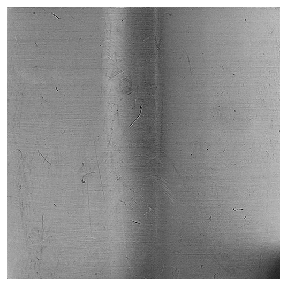

In [2]:
sharp_kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

sharp_img = sg.convolve(sharp_kernel, img, 'valid')
show_img(sharp_img, color="bw")

# Sobel edge detection

In [3]:
def sobel(img, sigma = 1):
    # Vertical Edges
    img_x = np.zeros(img.shape)
    filters.gaussian_filter(img, (sigma, sigma), (0, 1), img_x)
    
    # Horizontal Edges
    img_y = np.zeros(img.shape)
    filters.gaussian_filter(img, (sigma, sigma), (1, 0), img_y)
    
    # Magnitude
    magnitude = np.sqrt(img_x**2 + img_y**2)
    
    return magnitude

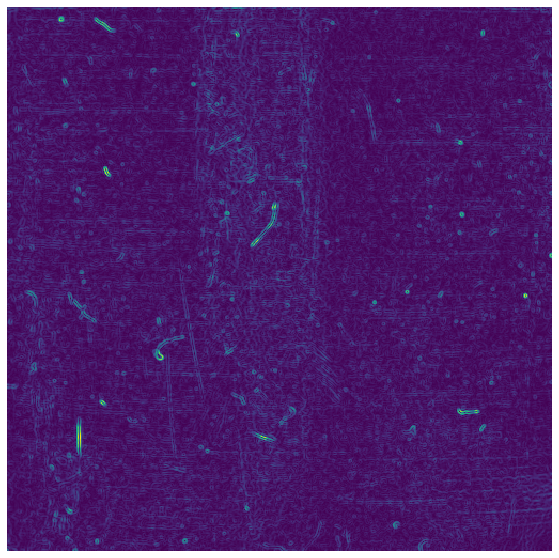

In [4]:
response_img = sobel(sharp_img)
show_img(response_img, size=(10,10))

### Threshold and binary

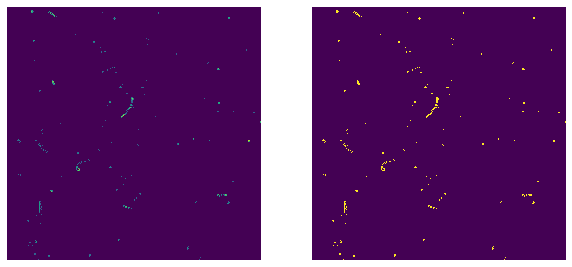

In [5]:
thresh_img = threshold(response_img, 10)
binary_img = thresh_img.astype(bool)

show_img(thresh_img, binary_img, size=(10,10))

# Connect neighboring regions
using first a morphological dialation to connect the neighboring regions and then skeletonizing the regions again to end up with the precise markings.

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


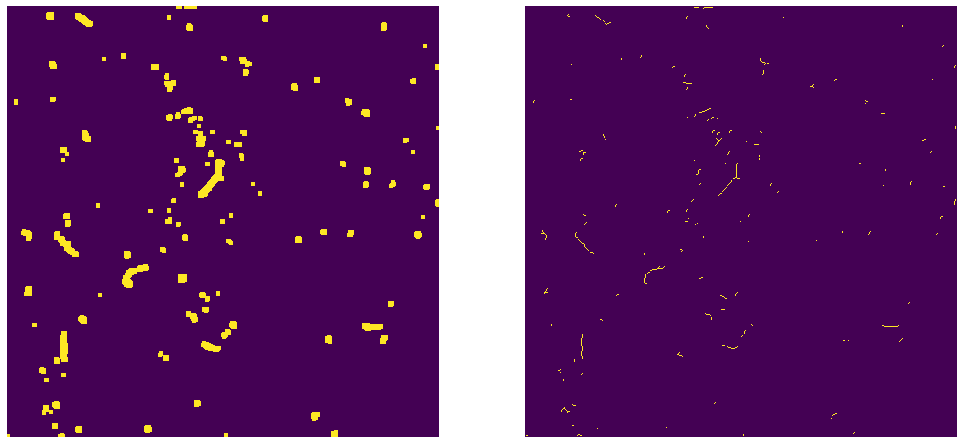

In [6]:
struct = morph.generate_binary_structure(2, 2)
print(struct)

dial_img = morph.binary_dilation(binary_img, structure=struct, iterations=2)
skeleton_img = skeletonize(dial_img,)

show_img(dial_img, skeleton_img, size=(17,17))

In [33]:
label_img = label(skeleton_img)
regions = regionprops(label_img, coordinates='rc')

scraches = []
for region in regions:
    if region.area > 14: 
        scrach = {'label':region.label, "area":region.area,
                  'eccentricity':region.eccentricity}
        scraches.append(scrach)

scraches_list = [scrach.get("label") for scrach in scraches]
scraches_img = np.reshape([0 if label not in scraches_list else label 
                for label in label_img.flatten()], label_img.shape)

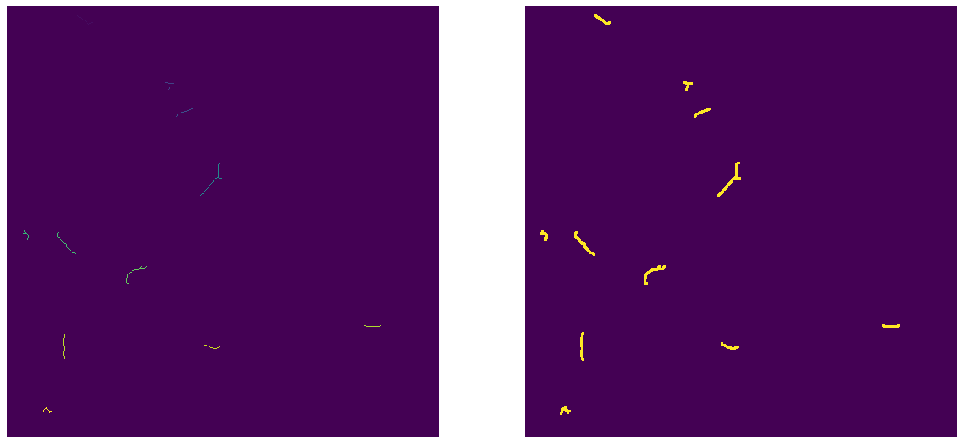

In [30]:
dial_img = morph.binary_dilation(scraches_img, structure=struct, iterations=1)
show_img(scraches_img, dial_img, size=(17,17))

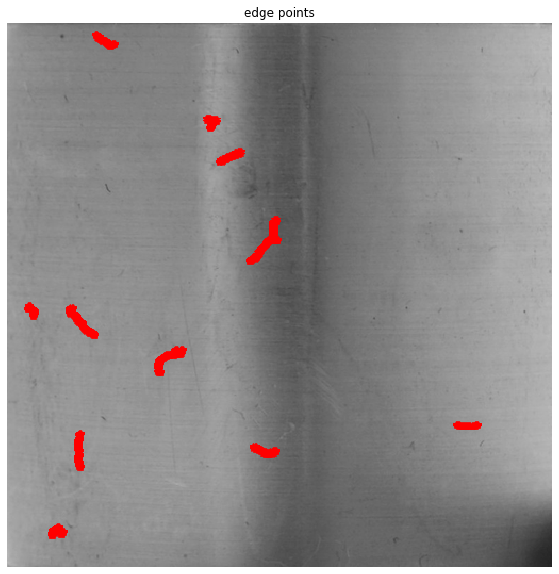

In [31]:
# Points
points = get_points(dial_img, min_dist=10, allow_cluster=True)
overlay_points(img, points, size=(10, 10))